# 2.3 Two Simple Approaches to Prediction: Least Squares and Nearest Neighbors


In this section we develop two simple but powerful prediction methods: 
the linear model fit by least squares and the k-nearest-neighbor prediction rule. 
The linear model makes _huge assumptions about structure and yields stable 
but possibly inaccurate predictions_. The method of k-nearest neighbors 
makes _very mild structural assumptions: its predictions are often accurate 
but can be unstable_. One should try to understand:

* __what does a stable prediction mean?__
* __what does an accurate preciction mean?__
* __how could we measure them?__

__Here is the answer__:

> The linear decision boundary from least squares is very smooth, and apparently stable to fit. It does appear to rely heavily on the assumption that a linear decision boundary is appropriate. In language we will develop shortly, it has low variance and potentially high bias. On the other hand, the 𝑘-nearest-neighbor procedures do not appear to rely on any stringent assumptions about the underlying data, and can adapt to any situation. However, any particular subregion of the decision boundary depends on a handful of input points and their particular positions, and is thus wiggly and unstable-high variance and low bias.

_Here is an illustration_:

![bias-variance](https://i.stack.imgur.com/AF3UE.png)

## 2.3.1 Linear Models and Least Squares

For the following multivariate linear regression model,

$$
\begin{equation*}
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_t \\
        \vdots  \\ 
        y_N
    \end{bmatrix} = \begin{bmatrix}
        1 & x_{12} & \cdots & x_{1k} \\
        1 & x_{22} & \cdots & x_{2k} \\
        \vdots & \vdots & \vdots \\
        1 & x_{t2} & \cdots & x_{tk} \\ 
        \vdots & \vdots & \vdots \\
        1 & x_{N2} & \cdots & x_{Nk} 
    \end{bmatrix} \begin{bmatrix}
        \beta_1 \\ 
        \beta_2 \\
        \vdots \\
        \beta_t \\ 
        \vdots \\
        \beta_k
    \end{bmatrix} + \begin{bmatrix}
        u_1 \\
        u_2 \\
        \vdots \\
        u_t \\
        \vdots  \\ 
        u_N
    \end{bmatrix}
\end{equation*} 
$$

or simply:

\begin{equation}
    Y = X \beta + u 
\end{equation}



where, $Y$ is a $N \times 1$ vector, $X$ is a $N \times k$ matrix, and 
$\beta$ is a $k \times 1$ vector. 
With assumptions:
\begin{align*}
    & E(u)  = 0 \ \ \ \ 
    V(u)  = \sigma^2 I \\ 
    & \text{X is fixed} \ \ \ \ 
    \text{X  has full rank k (or $k < N$)} 
\end{align*}

The method of OLS estimation chooses the values for $\beta_{1}, \beta_{2}, \ldots, \beta_{k}$, denoted $\hat{\beta}_{1}, \hat{\beta}_{2}, \ldots, \hat{\beta}_{k}$, that minimize the residuals sum of squares :
$$
R S S=\sum_{t=1}^{T} \hat{u}_{t}^{2}
$$
In matrix form this translates to:
$$
\text { choose } \hat{\beta} \text { to minimize } R S S=\hat{u}^{\prime} \hat{u}
$$
where $\hat{u}=y-X \hat{\beta}$. Now,
$$
\begin{aligned}
R S S &=\hat{u}^{\prime} \hat{u}=(y-X \hat{\beta})^{\prime}(y-X \hat{\beta}) \\
&=\left(y^{\prime}-\hat{\beta}^{\prime} X^{\prime}\right)(y-X \hat{\beta}) \\
&=y^{\prime} y-y^{\prime} X \hat{\beta}-\hat{\beta}^{\prime} X^{\prime} y+\hat{\beta}^{\prime} X^{\prime} X \hat{\beta} \\
&=y^{\prime} y-2 y^{\prime} X \hat{\beta}+\hat{\beta}^{\prime} X^{\prime} X \hat{\beta}
\end{aligned}
$$
where the last line follows because $\hat{\beta}^{\prime} X^{\prime} y$ is a scalar and hence equal to $\left(\hat{\beta}^{\prime} X^{\prime} y\right)^{\prime}=$ $y^{\prime} X \hat{\beta}$
The first order conditions for minimizing $R S S$ is:
$$
\frac{\partial R S S}{\partial \hat{\beta}}=0,
$$
and to obtain this $k$ dimensional vector of partial derivatives we will require the following two results from the appendix
$$
\frac{\partial A b}{\partial b}=A^{\prime} \quad ; \quad \frac{\partial b^{\prime} A b}{\partial b}=2 A b,
$$
so that
$$
\frac{\partial R S S}{\partial \hat{\beta}}=-2 X^{\prime} y+2 X^{\prime} X \hat{\beta}
$$
Equating to 0 gives
$$
X^{\prime} X \hat{\beta}=X^{\prime} y,
$$
and solving yields the OLS estimator


\begin{equation}
\hat{\beta}=\left(X^{\prime} X\right)^{-1} X^{\prime} y .
\end{equation}


Note that $\left(X^{\prime} X\right)^{-1}$ must exist given the assumption that $X$ has full column rank $k$. Also, note that second order conditions for a minimum are satisfied:
$$
\frac{\partial^{2} R S S}{\partial \hat{\beta} \partial \hat{\beta}^{\prime}}=2 X^{\prime} X>0 \text { (i.e. is a positive definite matrix) }
$$
We call $\hat{y}=X \hat{\beta}$ the fitted values from the estimated regression.

## 2.3.2 Nearest-Neighbor Methods

Nearest-neighbor methods use those observations in the training set 
$\tau$ closest in input space to x to form $\hat{Y}$. Specifically, 
the k-nearest neighbor fit for $\hat{Y}$ is defined as follows:

\begin{equation}
\hat{Y} = \frac{1}{k} = \sum_{x_i \in N_k(x)} y_i
\end{equation}

where $N_k(x)$ is the neighborhood of x defined by the $k$ closest points $x_i$ 
in the training sample. Closeness implies a metric, which for the moment 
we assume is Euclidean distance. So, in words, we find the $k$ observations 
with $x_i$ closest to x in input space, and average their responses.

## Using simulated data to understand thosw two models

Now, we will simulate a dataset to check how those two models will predict.
The data is generated with following steps:

1. Generate 10 means $m_k$ from a bivariate Gaussian for each class  

$$
\begin{equation}
m_k \sim \begin{cases}
N((1,0)^T, \mathbf{I}) & \text{ for BLUE}, \\
N((0,1)^T, \mathbf{I}) & \text{ for ORANGE}
\end{cases}
\end{equation}
$$
  
2. For each class, we generate 100 observations as follows:
  1. Pick an $m_k$ at random with probability 1/10
  2. Generate $x_i \sim N(m_k, \mathbf{I}/5)$


__Remark__: all code were encapsulated in the file [ch2_osl](ch2_osl.py). You 
could read the source code to replicate the plot. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
from ch2_osl import OverviewSL
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']

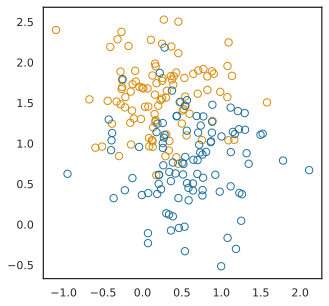

In [2]:
osl = OverviewSL()
osl.plot_data()

The estimated coefficents are [ 0.00959921 -0.20271151  0.48865941]


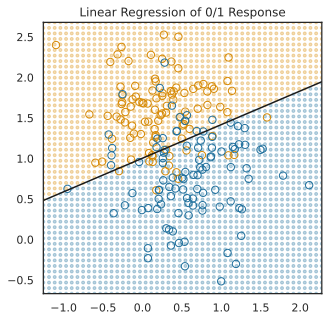

In [3]:
osl.fit_with_linear_model()
osl.plot_linear_model()

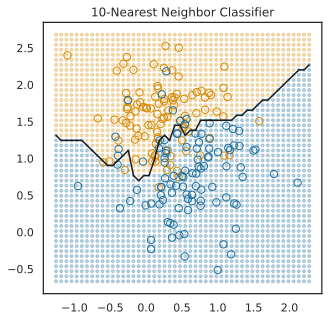

In [4]:
osl.fit_with_nearest_neighbors(k=10, boundary_line=True)

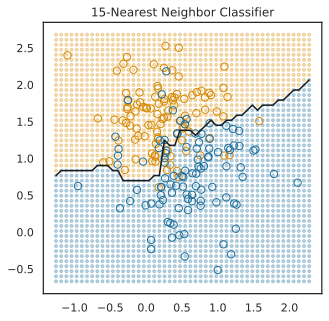

In [5]:
osl.fit_with_nearest_neighbors(k=15, boundary_line=True)

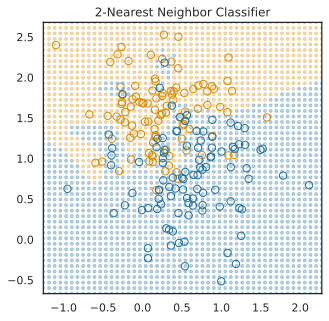

In [6]:
osl.fit_with_nearest_neighbors(k=2)

## 2.3.3 From Least Squares to Nearest Neighbors

The linear decision boundary from least squares is very smooth, and apparently
stable to fit. It does appear to rely heavily on the assumption that a 
linear decision boundary is appropriate. In language we will develop shortly, 
it has __low variance and potentially high bias__.

On the other hand, the k-nearest-neighbor procedures do not appear to rely on 
any stringent assumptions about the underlying data, and can adapt to any 
situation. However, any particular subregion of the decision boundary 
depends on a handful of input points and their particular positions, and is 
thus wiggly and unstable-__high variance and low bias__.

<img src="./images/tradeoff.png" style="width: 700px;" alt="tradeoff"/>


__Take Away__:

* The linear model makes _huge assumptions about structure and yields stable 
but possibly inaccurate predictions_. 

* The method of k-nearest neighbors 
makes _very mild structural assumptions: its predictions are often accurate 
but can be unstable_. 

## Why those two models are so important ?

A large subset of the most popular techniques in use today are variants of 
these two simple procedures. In fact 1-nearest-neighbor, the simplest of all, 
captures a large percentage of the market for low-dimensional problems. 
The following list describes some ways in which these simple procedures 
have been enhanced:

* Kernel methods use weights that decrease smoothly to zero with distance 
from the target point, rather than the effective 0/1 weights used by 
k-nearest neighbors.
* In high-dimensional spaces the distance kernels are modified to emphasize 
some variable more than others.
* Local regression fits linear models by locally weighted least squares, rather
than fitting constants locally.
* Linear models fit to a basis expansion of the original inputs allow 
arbitrarily complex models.
* Projection pursuit and neural network models consist of sums of 
nonlinearly transformed linear models.